In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions



/Users/varyabazilova/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

def prepare_dfcount_for_plot(dfcount):
    melted = pd.melt(dfcount, id_vars=['date_id', 'year', 'month'], var_name='elevation', value_name='dfs_count')
    # melted = pd.melt(dfcount, id_vars=['date_id'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # create unique id for elevation and month for merging
    melted['elevation'] = melted['elevation'].astype(int)
    melted['id'] = melted.index.astype(str)+ "_" + melted['elevation'].astype(str) + "_" + melted['year'].astype(str)+ "_" + melted['month'].astype(str)
    
    # melted = melted.sort_values('elevation_bin')
    # melted = melted.dropna(subset=['dfs_count'])
    return melted 



def calculate_floods(df, method):
    # df percent 
    df[f'dfs_count_{method}40_percent'] = (df[f'dfs_count_{method}40'] *100) / df.dfspot_count
    df[f'dfs_count_{method}30_percent'] = (df[f'dfs_count_{method}30'] *100) / df.dfspot_count
    df[f'dfs_count_{method}20_percent'] = (df[f'dfs_count_{method}20'] *100) / df.dfspot_count
    # ff count 
    df[f'ffs_count_{method}40'] = df.dfspot_count - df[f'dfs_count_{method}40']
    df[f'ffs_count_{method}30'] = df.dfspot_count - df[f'dfs_count_{method}30']
    df[f'ffs_count_{method}20'] = df.dfspot_count - df[f'dfs_count_{method}20']
    # ff percent
    df[f'ffs_count_{method}40_percent'] = (df[f'ffs_count_{method}40'] *100) / df.dfspot_count
    df[f'ffs_count_{method}30_percent'] = (df[f'ffs_count_{method}30'] *100) / df.dfspot_count
    df[f'ffs_count_{method}20_percent'] = (df[f'ffs_count_{method}20'] *100) / df.dfspot_count
    return df

In [3]:
freq = 'monthly'
column = 'dfspot'
location = 'langtang'


flood_folder =  f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/dfspot_count/{location}2/'

dfspot1 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover1.csv', index_col = 0).fillna(0)
dfspot2 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover2.csv', index_col = 0).fillna(0)
dfspot3 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover3.csv', index_col = 0).fillna(0)
dfspot4 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover4.csv', index_col = 0).fillna(0)

dfspot1_melted = prepare_dfcount_for_plot(dfspot1)
dfspot2_melted = prepare_dfcount_for_plot(dfspot2)
dfspot3_melted = prepare_dfcount_for_plot(dfspot3)
dfspot4_melted = prepare_dfcount_for_plot(dfspot4)


In [4]:
dfspot1_melted # 20644 -> (397rows * 52 columns)

# 74636

,date_id,year,month,elevation,dfs_count,elevation_bin,id
0,1989_9,1989,9,4485,1,4000 - 4500,0_4485_1989_9
1,1989_10,1989,10,4485,0,4000 - 4500,1_4485_1989_10
2,1989_11,1989,11,4485,0,4000 - 4500,2_4485_1989_11
3,1989_12,1989,12,4485,0,4000 - 4500,3_4485_1989_12
4,1990_1,1990,1,4485,0,4000 - 4500,4_4485_1990_1
...,...,...,...,...,...,...,...
20639,2022_5,2022,5,5936,0,5500 - 6000,20639_5936_2022_5
20640,2022_6,2022,6,5936,0,5500 - 6000,20640_5936_2022_6
20641,2022_7,2022,7,5936,0,5500 - 6000,20641_5936_2022_7
20642,2022_8,2022,8,5936,0,5500 - 6000,20642_5936_2022_8


In [5]:
dfspot1_melted.elevation.unique().shape

(52,)

# daily input 

In [6]:
daily20_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_dfs_count_20percent_landcover1.csv', index_col = 0).fillna(0)
daily20_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_dfs_count_20percent_landcover2.csv', index_col = 0).fillna(0)
daily20_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_dfs_count_20percent_landcover3.csv', index_col = 0).fillna(0)
daily20_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_dfs_count_20percent_landcover4.csv', index_col = 0).fillna(0)

daily30_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_dfs_count_30percent_landcover1.csv', index_col = 0).fillna(0)
daily30_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_dfs_count_30percent_landcover2.csv', index_col = 0).fillna(0)
daily30_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_dfs_count_30percent_landcover3.csv', index_col = 0).fillna(0)
daily30_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_dfs_count_30percent_landcover4.csv', index_col = 0).fillna(0)

daily40_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_dfs_count_40percent_landcover1.csv', index_col = 0).fillna(0)
daily40_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_dfs_count_40percent_landcover2.csv', index_col = 0).fillna(0)
daily40_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_dfs_count_40percent_landcover3.csv', index_col = 0).fillna(0)
daily40_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_dfs_count_40percent_landcover4.csv', index_col = 0).fillna(0)


daily20_lc1_melted = prepare_dfcount_for_plot(daily20_lc1).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc2_melted = prepare_dfcount_for_plot(daily20_lc2).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc3_melted = prepare_dfcount_for_plot(daily20_lc3).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc4_melted = prepare_dfcount_for_plot(daily20_lc4).rename(columns={'dfs_count': 'dfs_count_daily20'})

daily30_lc1_melted = prepare_dfcount_for_plot(daily30_lc1).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc2_melted = prepare_dfcount_for_plot(daily30_lc2).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc3_melted = prepare_dfcount_for_plot(daily30_lc3).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc4_melted = prepare_dfcount_for_plot(daily30_lc4).rename(columns={'dfs_count': 'dfs_count_daily30'})

daily40_lc1_melted = prepare_dfcount_for_plot(daily40_lc1).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc2_melted = prepare_dfcount_for_plot(daily40_lc2).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc3_melted = prepare_dfcount_for_plot(daily40_lc3).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc4_melted = prepare_dfcount_for_plot(daily40_lc4).rename(columns={'dfs_count': 'dfs_count_daily40'})


In [7]:
# make 4 dfs depending ont he scenatio 
merge_on = ['year', 'month', 'elevation', 'elevation_bin', 'id']

# ------- landcover1
dfs = [daily20_lc1_melted, daily30_lc1_melted, daily40_lc1_melted]

lc1_daily = dfs[0][merge_on + ['dfs_count_daily20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_daily{label}'  # Adjust unique column name
    lc1_daily = pd.merge(lc1_daily, df[merge_on + [unique_col]], on=merge_on)

# add dfspot    
lc1_daily['dfspot_count'] = dfspot1_melted.dfs_count

# ------- landcover2
dfs = [daily20_lc2_melted, daily30_lc2_melted, daily40_lc2_melted]

lc2_daily = dfs[0][merge_on + ['dfs_count_daily20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_daily{label}'  # Adjust unique column name
    lc2_daily = pd.merge(lc2_daily, df[merge_on + [unique_col]], on=merge_on)

lc2_daily['dfspot_count'] = dfspot2_melted.dfs_count

# ------- landcover3
dfs = [daily20_lc3_melted, daily30_lc3_melted, daily40_lc3_melted]

lc3_daily = dfs[0][merge_on + ['dfs_count_daily20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_daily{label}'  # Adjust unique column name
    lc3_daily = pd.merge(lc3_daily, df[merge_on + [unique_col]], on=merge_on)

lc3_daily['dfspot_count'] = dfspot3_melted.dfs_count

# ------- landcover4
dfs = [daily20_lc4_melted, daily30_lc4_melted, daily40_lc4_melted]

lc4_daily = dfs[0][merge_on + ['dfs_count_daily20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_daily{label}'  # Adjust unique column name
    lc4_daily = pd.merge(lc4_daily, df[merge_on + [unique_col]], on=merge_on)

lc4_daily['dfspot_count'] = dfspot4_melted.dfs_count


In [8]:
lc1_daily = calculate_floods(lc1_daily, 'daily')#.fillna(0)
lc2_daily = calculate_floods(lc2_daily, 'daily')#.fillna(0)
lc3_daily = calculate_floods(lc3_daily, 'daily')#.fillna(0)
lc4_daily = calculate_floods(lc4_daily, 'daily')#.fillna(0)


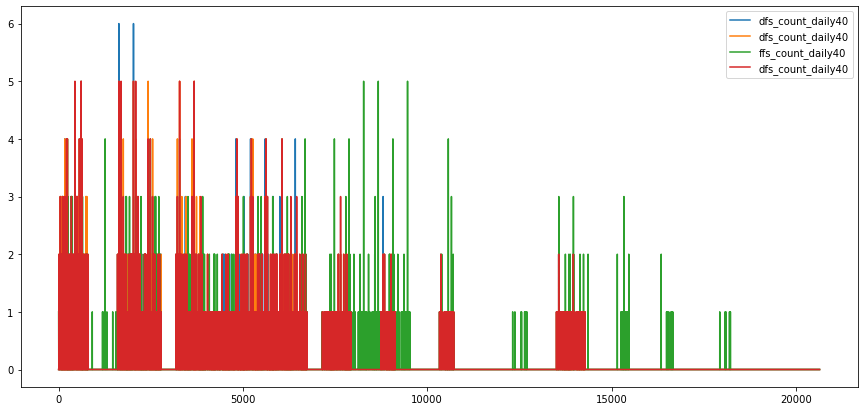

In [9]:
# lc2_daily.dfspot_count.plot(figsize = (15, 7))

lc1_daily.dfs_count_daily40.plot(figsize = (15, 7))
lc2_daily.dfs_count_daily40.plot(figsize = (15, 7))
lc2_daily.ffs_count_daily40.plot(figsize = (15, 7))
lc4_daily.dfs_count_daily40.plot(figsize = (15, 7))

plt.legend()

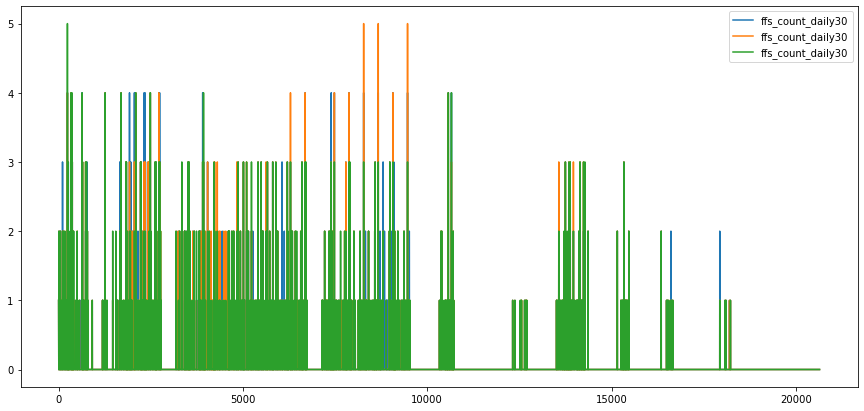

In [10]:
lc1_daily.ffs_count_daily30.plot(figsize = (15, 7))
lc2_daily.ffs_count_daily30.plot(figsize = (15, 7))
lc4_daily.ffs_count_daily30.plot(figsize = (15, 7))

plt.legend()

# once per year input

In [11]:

once20_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_dfs_count_20percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once20_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_dfs_count_20percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once20_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_dfs_count_20percent_landcover3.csv', index_col = 0).fillna(0)[:-1]#[:372]
once20_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_dfs_count_20percent_landcover4.csv', index_col = 0).fillna(0)#[:372]

once30_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_dfs_count_30percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once30_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_dfs_count_30percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once30_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_dfs_count_30percent_landcover3.csv', index_col = 0).fillna(0)#[:372]
once30_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_dfs_count_30percent_landcover4.csv', index_col = 0).fillna(0)#[:372]

once40_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_dfs_count_40percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once40_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_dfs_count_40percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once40_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_dfs_count_40percent_landcover3.csv', index_col = 0).fillna(0)#[:372]
once40_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_dfs_count_40percent_landcover4.csv', index_col = 0).fillna(0)#[:372]


once20_lc1_melted = prepare_dfcount_for_plot(once20_lc1).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc2_melted = prepare_dfcount_for_plot(once20_lc2).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc3_melted = prepare_dfcount_for_plot(once20_lc3).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc4_melted = prepare_dfcount_for_plot(once20_lc4).rename(columns={'dfs_count': 'dfs_count_once20'})

once30_lc1_melted = prepare_dfcount_for_plot(once30_lc1).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc2_melted = prepare_dfcount_for_plot(once30_lc2).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc3_melted = prepare_dfcount_for_plot(once30_lc3).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc4_melted = prepare_dfcount_for_plot(once30_lc4).rename(columns={'dfs_count': 'dfs_count_once30'})

once40_lc1_melted = prepare_dfcount_for_plot(once40_lc1).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc2_melted = prepare_dfcount_for_plot(once40_lc2).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc3_melted = prepare_dfcount_for_plot(once40_lc3).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc4_melted = prepare_dfcount_for_plot(once40_lc4).rename(columns={'dfs_count': 'dfs_count_once40'})


In [12]:
# make 4 dfs depending ont he scenatio 
merge_on = ['year', 'month', 'elevation', 'elevation_bin', 'id']

# ------- landcover1
dfs = [once20_lc1_melted, once30_lc1_melted, once40_lc1_melted]

lc1_once = dfs[0][merge_on + ['dfs_count_once20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_once{label}'  # Adjust unique column name
    lc1_once = pd.merge(lc1_once, df[merge_on + [unique_col]], on=merge_on)
lc1_once['dfspot_count'] = dfspot1_melted.dfs_count

# ------- landcover2
dfs = [once20_lc2_melted, once30_lc2_melted, once40_lc2_melted]

lc2_once = dfs[0][merge_on + ['dfs_count_once20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_once{label}'  # Adjust unique column name
    lc2_once = pd.merge(lc2_once, df[merge_on + [unique_col]], on=merge_on)
lc2_once['dfspot_count'] = dfspot2_melted.dfs_count

# ------- landcover3
dfs = [once20_lc3_melted, once30_lc3_melted, once40_lc3_melted]

lc3_once = dfs[0][merge_on + ['dfs_count_once20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_once{label}'  # Adjust unique column name
    lc3_once = pd.merge(lc3_once, df[merge_on + [unique_col]], on=merge_on)
lc3_once['dfspot_count'] = dfspot3_melted.dfs_count


# ------- landcover4
dfs = [once20_lc4_melted, once30_lc4_melted, once40_lc4_melted]

lc4_once = dfs[0][merge_on + ['dfs_count_once20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_once{label}'  # Adjust unique column name
    lc4_once = pd.merge(lc4_once, df[merge_on + [unique_col]], on=merge_on)
lc4_once['dfspot_count'] = dfspot4_melted.dfs_count


In [13]:
lc1_once = calculate_floods(lc1_once, 'once')
lc2_once = calculate_floods(lc2_once, 'once')
lc3_once = calculate_floods(lc3_once, 'once')
lc4_once = calculate_floods(lc4_once, 'once')


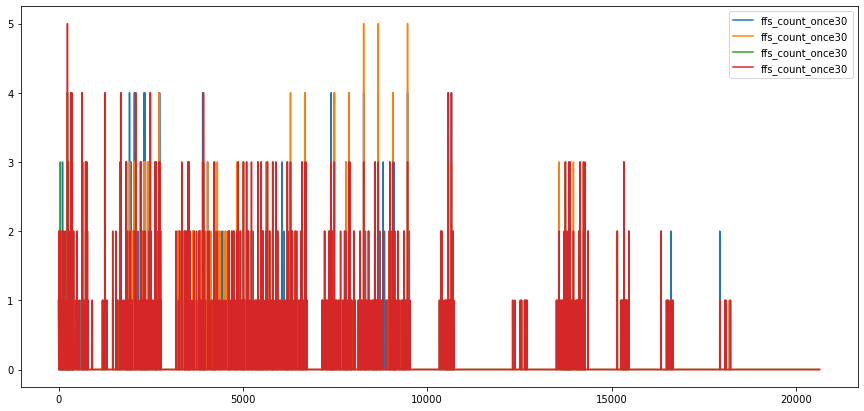

In [14]:
lc1_once.ffs_count_once30.plot(figsize = (15, 7))
lc2_once.ffs_count_once30.plot(figsize = (15, 7))
lc3_once.ffs_count_once30.plot(figsize = (15, 7))
lc4_once.ffs_count_once30.plot(figsize = (15, 7))

plt.legend()

In [15]:
lc4_once.columns

Index(['year', 'month', 'elevation', 'elevation_bin', 'id', 'dfs_count_once20',
       'dfs_count_once30', 'dfs_count_once40', 'dfspot_count',
       'dfs_count_once40_percent', 'dfs_count_once30_percent',
       'dfs_count_once20_percent', 'ffs_count_once40', 'ffs_count_once30',
       'ffs_count_once20', 'ffs_count_once40_percent',
       'ffs_count_once30_percent', 'ffs_count_once20_percent'],
      dtype='object')

# plots for all 

- heatmaps? 
- think cleverly of how you want to represent and what 


Text(0.5, 0.98, 'landcover3 (50% veg, 40% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations')

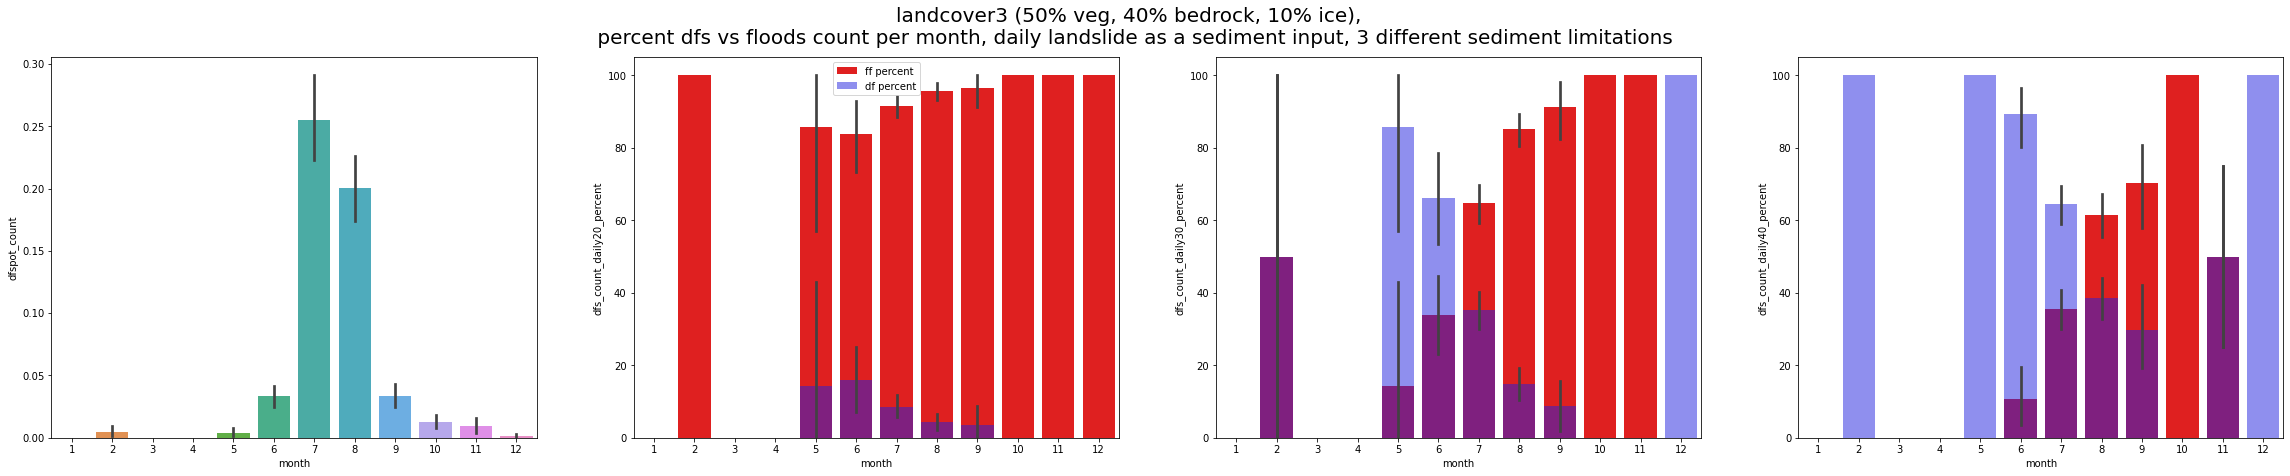

In [16]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcd
                            ''')

sns.barplot(ax = mosaic['a'], data=lc3_daily, x="month", y="dfspot_count")
sns.barplot(ax = mosaic['b'], data=lc3_daily, x="month", y="ffs_count_daily20_percent", color = 'red', label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc3_daily, x="month", y="ffs_count_daily30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc3_daily, x="month", y="ffs_count_daily40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc3_daily, x="month", y="dfs_count_daily20_percent", color = 'blue', alpha = 0.5, label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc3_daily, x="month", y="dfs_count_daily30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc3_daily, x="month", y="dfs_count_daily40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')

mosaic['b'].legend()
# plt.suptitle('landcover1 (40% veg, 40% bedrock, 20% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)
# plt.suptitle('landcover2 (40% veg, 50% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)
plt.suptitle('landcover3 (50% veg, 40% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)
# plt.suptitle('landcover4 (40% veg, 60% bedrock, 0% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)

Text(0.5, 0.98, 'landcover3 (50% veg, 40% bedrock, 10% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations')

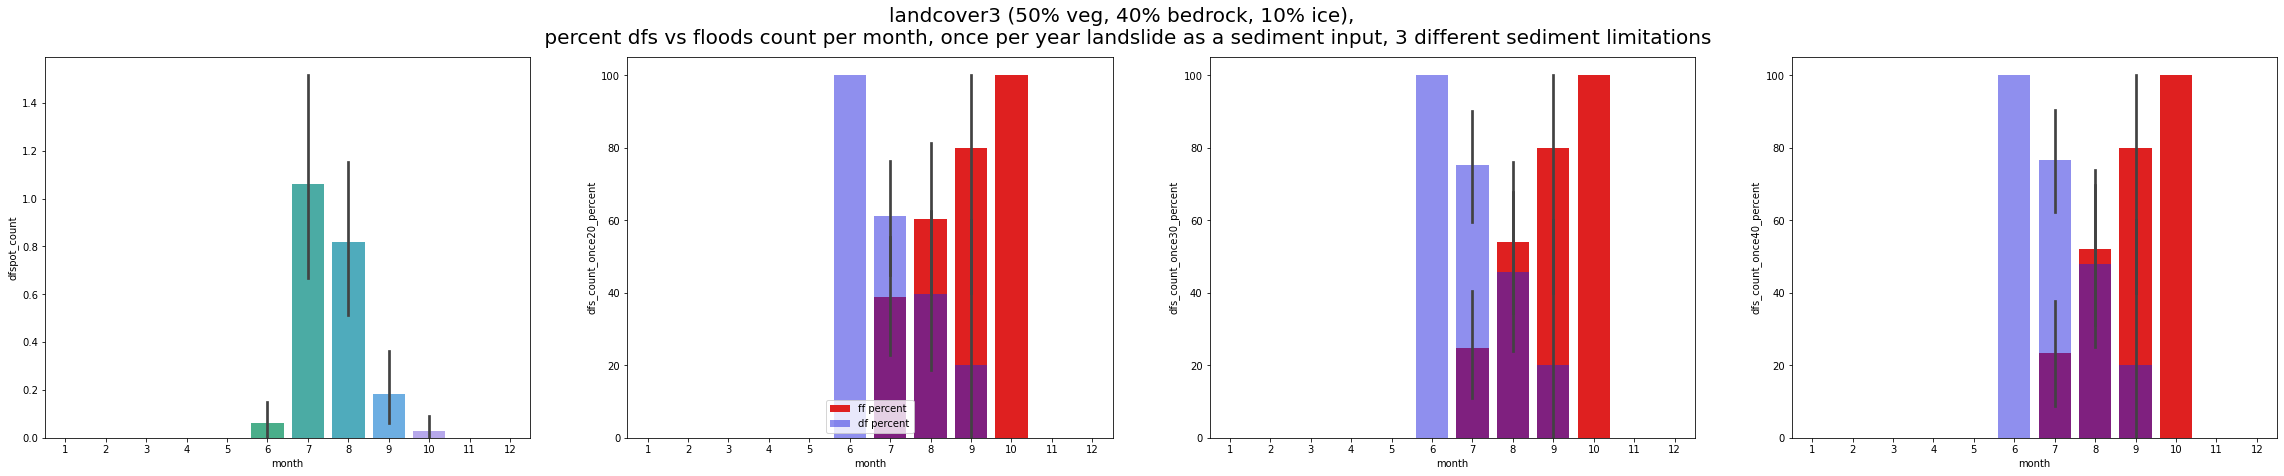

In [17]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcd
                            ''')

sns.barplot(ax = mosaic['a'], data=lc3_once, x="month", y="dfspot_count")
sns.barplot(ax = mosaic['b'], data=lc3_once, x="month", y="ffs_count_once20_percent", color = 'red', label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc3_once, x="month", y="ffs_count_once30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc3_once, x="month", y="ffs_count_once40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc3_once, x="month", y="dfs_count_once20_percent", color = 'blue', alpha = 0.5, label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc3_once, x="month", y="dfs_count_once30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc3_once, x="month", y="dfs_count_once40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')

mosaic['b'].legend()
# plt.suptitle('landcover1 (40% veg, 40% bedrock, 20% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations', fontsize = 20)
# plt.suptitle('landcover2 (40% veg, 50% bedrock, 10% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations', fontsize = 20)
plt.suptitle('landcover3 (50% veg, 40% bedrock, 10% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations', fontsize = 20)
# plt.suptitle('landcover4 (40% veg, 60% bedrock, 0% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations', fontsize = 20)

# difference per landcover 

- take "reference" landcover as 100% and calculate the % of the others 



In [18]:
dfs_potential = pd.DataFrame()

dfs_potential['year'] = lc2_daily.year
dfs_potential['month'] = lc2_daily.month
dfs_potential['elevation'] = lc2_daily.elevation
dfs_potential['elevation_bin'] = lc2_daily.elevation_bin
dfs_potential['id'] = lc2_daily.id


dfs_potential['dfspot_count_lc1']=lc1_daily.dfspot_count
dfs_potential['dfspot_count_lc2']=lc2_daily.dfspot_count
dfs_potential['dfspot_count_lc3']=lc3_daily.dfspot_count
dfs_potential['dfspot_count_lc4']=lc4_daily.dfspot_count


dfs_potential_percent = dfs_potential.copy()

In [19]:
def calculate_percentage(df, reference_col, target_cols):
    # Apply a function to each row to calculate the percentages
    df[reference_col] = df[reference_col].replace(0, np.nan)
    df[target_cols] = df.apply(lambda row: row[target_cols] / row[reference_col] * 100, axis=1)
    return df

# Specify 'col1' as the reference column and 'col2', 'col3', and 'col4' as the target columns
dfs_potential_percent = calculate_percentage(dfs_potential_percent, reference_col='dfspot_count_lc4', target_cols=['dfspot_count_lc1', 'dfspot_count_lc2', 'dfspot_count_lc3'])


In [20]:
# dfs_potential_percent

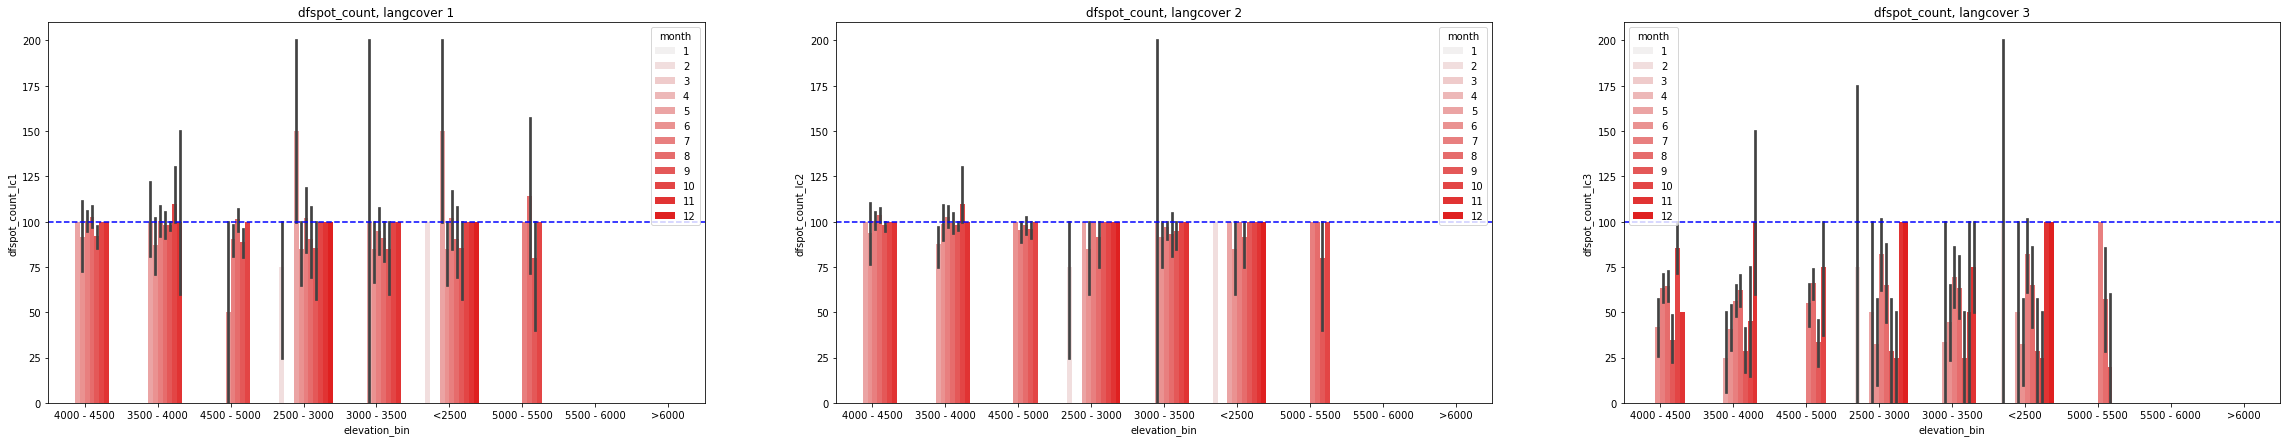

In [21]:
fig = plt.figure(figsize=(40, 7))
mosaic = fig.subplot_mosaic('''
                            abc
                            ''')

sns.barplot(ax = mosaic['a'], data=dfs_potential_percent, x="elevation_bin", y="dfspot_count_lc1", color = 'red', hue = 'month')#, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=dfs_potential_percent, x="elevation_bin", y="dfspot_count_lc2", color = 'red', hue = 'month') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=dfs_potential_percent, x="elevation_bin", y="dfspot_count_lc3", color = 'red', hue = 'month') #, hue = 'elevation_bin')

# Set titles for the individual subplots
mosaic['a'].set_title('dfspot_count, langcover 1')
mosaic['b'].set_title('dfspot_count, langcover 2')
mosaic['c'].set_title('dfspot_count, langcover 3')

mosaic['a'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)
mosaic['b'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)
mosaic['c'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)


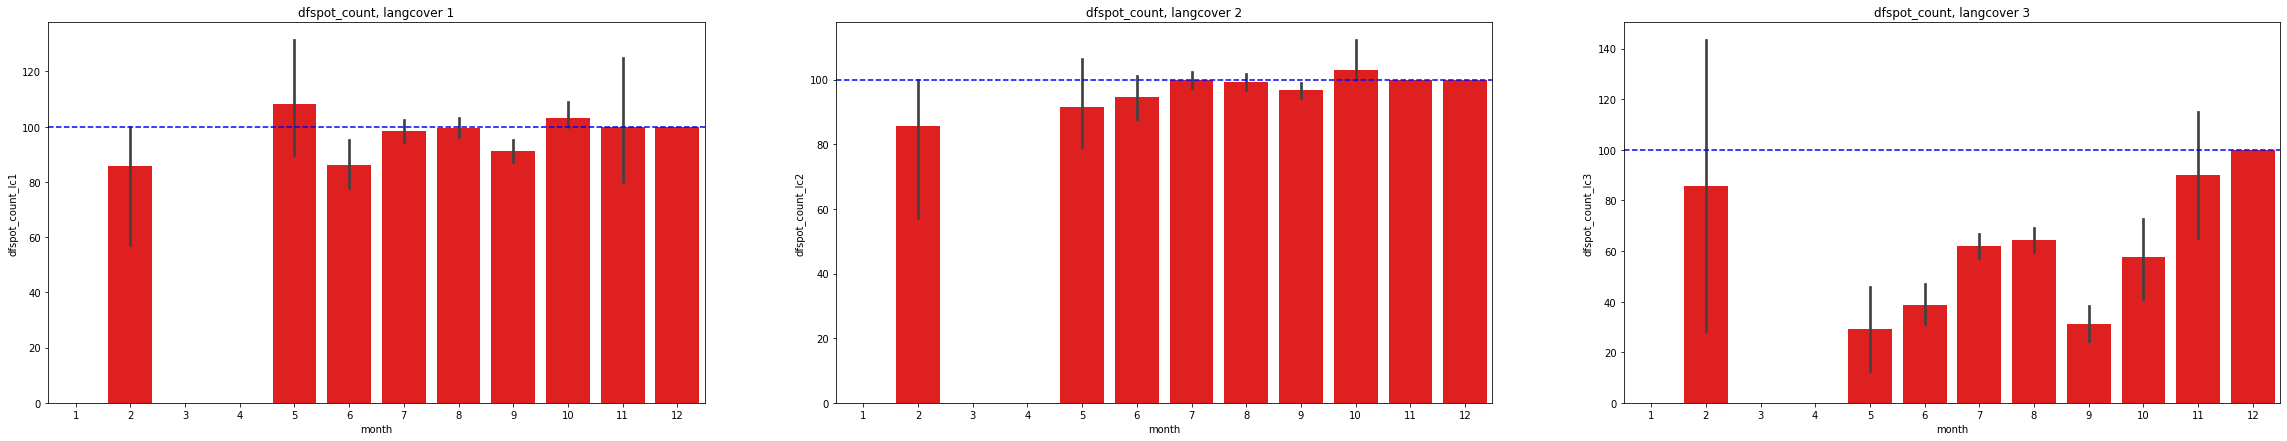

In [25]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abc
                            ''')

sns.barplot(ax = mosaic['a'], data=dfs_potential_percent, x="month", y="dfspot_count_lc1", color = 'red')#, hue = 'month')#, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=dfs_potential_percent, x="month", y="dfspot_count_lc2", color = 'red')#, hue = 'month') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=dfs_potential_percent, x="month", y="dfspot_count_lc3", color = 'red')#, hue = 'month') #, hue = 'elevation_bin')

# # Set titles for the individual subplots
mosaic['a'].set_title('dfspot_count, langcover 1')
mosaic['b'].set_title('dfspot_count, langcover 2')
mosaic['c'].set_title('dfspot_count, langcover 3')

mosaic['a'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)
mosaic['b'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)
mosaic['c'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)


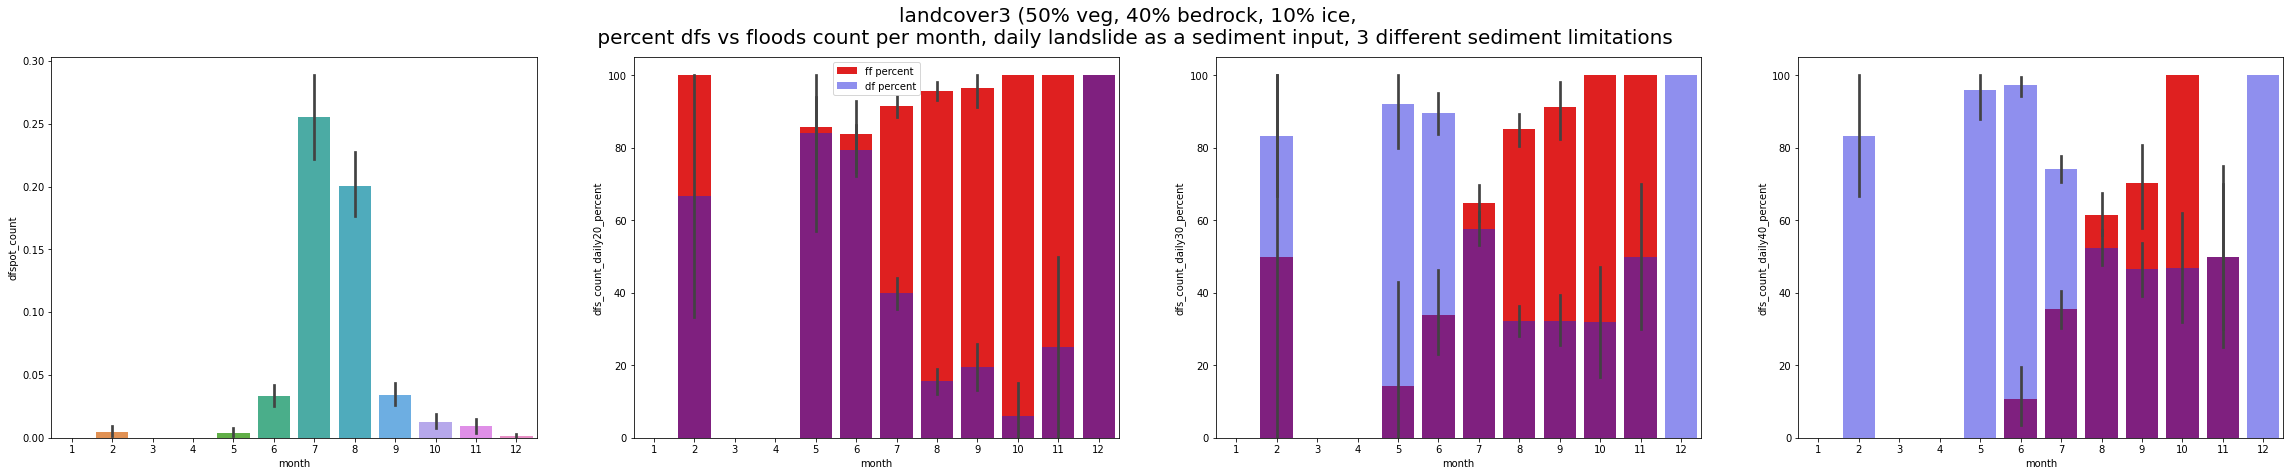

In [23]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcd
                            ''')

# First subplot
sns.barplot(ax = mosaic['a'], data=lc3_daily, x="month", y="dfspot_count")

# Second subplot - place bars next to each other
sns.barplot(ax = mosaic['b'], data=lc3_daily, x="month", y="ffs_count_daily20_percent", color = 'red', label = 'ff percent', dodge=True)
sns.barplot(ax = mosaic['b'], data=lc1_daily, x="month", y="dfs_count_daily20_percent", color = 'blue', alpha = 0.5, label = 'df percent', dodge=True)

# Third subplot - same for the other percentages
sns.barplot(ax = mosaic['c'], data=lc3_daily, x="month", y="ffs_count_daily30_percent", color = 'red', dodge=True)
sns.barplot(ax = mosaic['c'], data=lc1_daily, x="month", y="dfs_count_daily30_percent", color = 'blue', alpha = 0.5, dodge=True)

# Fourth subplot - same for the other percentages
sns.barplot(ax = mosaic['d'], data=lc3_daily, x="month", y="ffs_count_daily40_percent", color = 'red', dodge=True)
sns.barplot(ax = mosaic['d'], data=lc1_daily, x="month", y="dfs_count_daily40_percent", color = 'blue', alpha = 0.5, dodge=True)

# Add legend and title
mosaic['b'].legend()
plt.suptitle('landcover3 (50% veg, 40% bedrock, 10% ice, \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)

plt.show()
